In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from see import Segmentors
from see import JupyterGUI

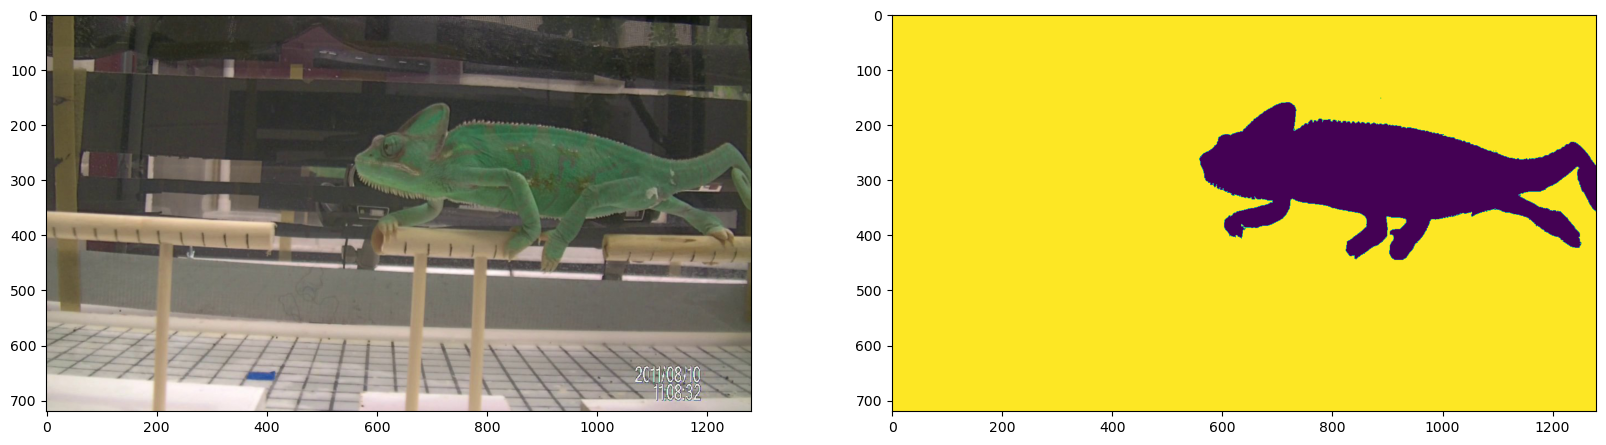

In [2]:
from imageio import v3 as imageio

img = imageio.imread('./Image_data/Examples/a_walk_in_the_park.jpg')
gmask = imageio.imread('./Image_data/Examples/a_walk_in_the_park_GT.jpg')

img = imageio.imread('./Image_data/Examples/AA_Chameleon.jpg')
gmask = imageio.imread('./Image_data/Examples/AA_Chameleon_GT.png')


fig = plt.figure(figsize=(20, 20))
my_ax = fig.add_subplot(1, 2, 1)
my_ax.imshow(img)
my_ax = fig.add_subplot(1, 2, 2)
my_ax.imshow(gmask)

In [3]:
from see import base_classes

# put data in a pipeline
data = base_classes.pipedata()
data.append(img)
data.gtruth = gmask

In [4]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch

#define an algorithm workflow
workflow.addalgos([colorspace, segmentor, segment_fitness])

In [5]:
#Chameleon
#params = ['YDbDr', True, 2, 'ColorThreshold', 0.90234375, 0.79296875, 0.48828125, 0.1953125, 0.421875, 0.50390625, 5, 5]
#params = ['YDbDr', False, 2, 'ColorThreshold', 0.73828125, 0.55859375, 0.72265625, 0.1953125, 0.0078125, 0.44140625, 2, 7]

# Walk
params = ['YDbDr', True, 1, 'ColorThreshold', 0.49609375, 0.125, 0.546875, 0.0, 0.171875, 0.50390625, 8, 5]
#params = ['YCbCr', True, 1, 'Felzenszwalb', 0.83203125, 0.390625, 0.296875, 0.87890625, 0.28515625, 0.08203125, 0, 5]

In [6]:
workf = workflow(params)
data = workf.pipe(data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


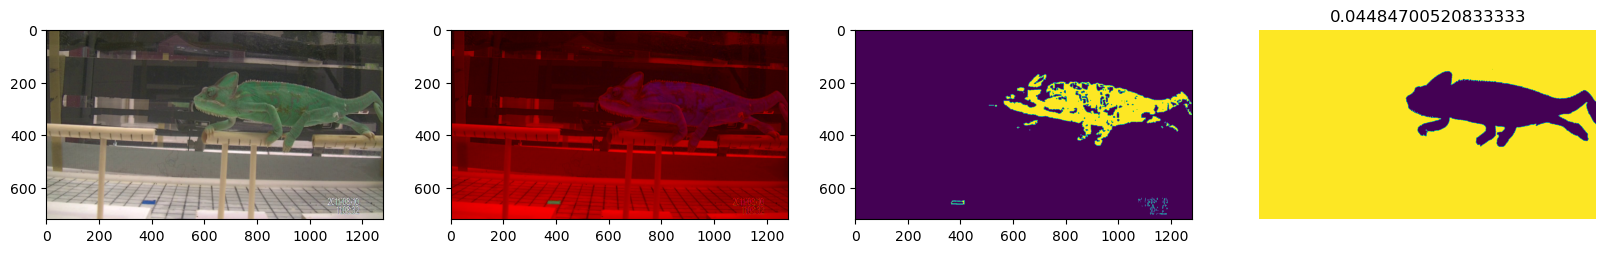

In [7]:
plt.figure(figsize=(20, 10))

for index,img in enumerate(data):
    plt.subplot(1, len(data)+1, index+1)
    plt.imshow(img)
    #plt.axis('off')

plt.subplot(1, len(data)+1, index+1)
plt.subplot(1, len(data)+1, index+2)
plt.imshow(data.gtruth)
plt.title(data.fitness)
plt.axis('off')


plt.tight_layout
plt.show()

In [8]:
len(data)


3

In [9]:
index

2